<a href="https://colab.research.google.com/github/mesushan/-CNN-for-cifar10-dataset/blob/master/Building_a_Convolutional_Neural_Network_in_TensorFlow_2_0_for_cifar10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Data source for CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html)

## Step 1: Installing dependencies and notebook gpu setup

In [0]:
!pip install tensorflow-gpu==2.1-rc0

## Step 2: Importing the libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.1.0-rc0'

## Step 3: Data Preprocessing

### Loading the Cifar10 dataset

In [0]:
# Setting the class names in the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
# Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### Normalizing the image
Dividing each pixels of image by 255 so that all the pixels of images will be in the range of 0 and 1.

In [0]:
X_train = X_train / 255.0

In [6]:
X_train.shape

(50000, 32, 32, 3)

first dimension is the index of the image, 2nd and 3rd are the 2*2 dimension of the image and the last is the RGB format containing the three channels of red, green and blue which makes color.



In [0]:
X_test = X_test / 255.0

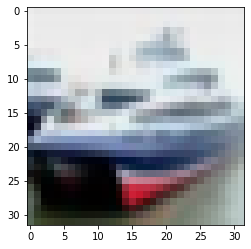

In [8]:
plt.imshow(X_test[1])

## Step 4: Building a Convolutional Neural Network

### Defining the model

In [0]:
model = tf.keras.models.Sequential()

### Adding the first convolutional layer

CNN layer hyper-parameters to be used:

    filters: 32
    kernel_size: 3
    padding: same
    activation: relu
    input_shape: (32, 32, 3)


In [0]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

### Adding the second convolutional layer and the max-pooling layer

CNN layer hyper-parameters to be used:

    filters: 32
    kernel_size:3
    padding: same
    activation: relu

MaxPool layer hyper-parameters to be used:

    pool_size: 2
    strides: 2
    padding: valid

Note: Strides is an argument of a Conv layer and with  this parameter, we can define the number of pixels a kernel can move in any direction and analyses the input image.

[Difference between 'same' and 'valid' padding explained here](https://www.corvil.com/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow)

In [0]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the third convolutional layer

CNN layer hyper-parameters:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu


In [0]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

###  Adding the fourth convolutional layer and max-pooling layer

CNN layer hyper-parameters:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu

MaxPool layer hyper-parameters:

    pool_size: 2
    strides: 2
    padding: valid


In [0]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the flattening layer

In [0]:
model.add(tf.keras.layers.Flatten())

### Adding the first fully-connected layer

Dense layer hyper-parameters:
    units/neurons: 128
    activation: relu

In [0]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Adding the output layer

Dense layer hyper-parameters:

    units/neurons: 10 (number of classes)
    activation: softmax


In [0]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

### Compiling the model

#### sparse_categorical_accuracy
sparse_categorical_accuracy checks to see if the maximal true value is equal to the index of the maximal predicted value.

[Difference between categorical accuracy and sparse categorical accuracy](https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy) 

In [0]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

### Training the model

In [21]:
model.fit(X_train, y_train, epochs=5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 10s 199us/sample - loss: 1.3540 - sparse_categorical_accuracy: 0.5109
Epoch 2/5
50000/50000 [==============================] - 7s 133us/sample - loss: 0.9153 - sparse_categorical_accuracy: 0.6773
Epoch 3/5
50000/50000 [==============================] - 7s 133us/sample - loss: 0.7410 - sparse_categorical_accuracy: 0.7397
Epoch 4/5
50000/50000 [==============================] - 7s 133us/sample - loss: 0.6146 - sparse_categorical_accuracy: 0.7860
Epoch 5/5
50000/50000 [==============================] - 7s 134us/sample - loss: 0.5144 - sparse_categorical_accuracy: 0.8185


### Evaluating the model

In [22]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 95us/sample - loss: 0.8031 - sparse_categorical_accuracy: 0.7378


In [23]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7378000020980835


From this model, we get the accuracy of 73% in test dataset but approx 82% in the testing dataset which shows a sign of overfitting. In the next model, lets see if we can improve the model.